<a href="https://colab.research.google.com/github/HectorGGlez/GoogleColab/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FACE DETECTOR BY EFGHI

**Important**

To run the code it´s necesary go step by step and load all the necesary XML files, also remember to take the photo.

You cand find the files in this link: https://github.com/opencv/opencv/tree/3.4/data/haarcascades



## CODE SNIPPET TO INITIALIZE CAMERA

In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

### CAMERA ACTION

<IPython.core.display.Javascript object>

Saved to photo.jpg


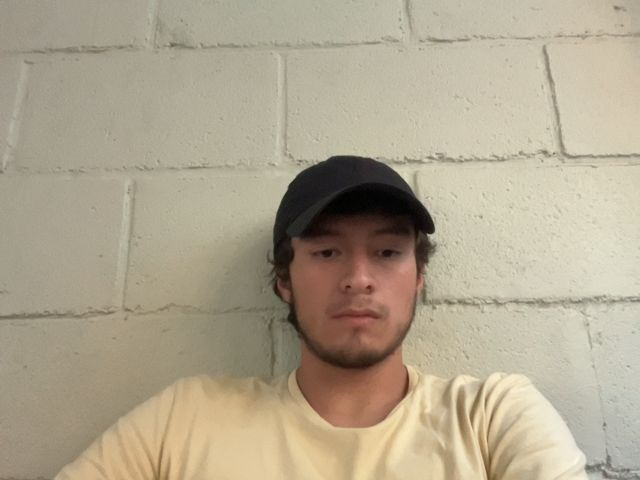

In [11]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))




## CLASS CODE
This code imports CV ibrary from OpenCV to make a frontal and eye recognition from a face

In [ ]:

  from google.colab.patches import cv2_imshow

import cv2 as cv

def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)

    cv2_imshow(frame)





## CAPTURE SECTION

In this section the camera takes the photo and show it the face in a frame

In [ ]:
face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()

face_cascade.load(cv.samples.findFile('/haarcascade_frontalface_alt.xml'))
eyes_cascade.load(cv.samples.findFile('/haarcascade_eye_tree_eyeglasses.xml'))


image= cv.imread("photo.jpg")
detectAndDisplay(image)


## MY CODE 

This code do the same thing but only with the default frontal face library from OpenCv

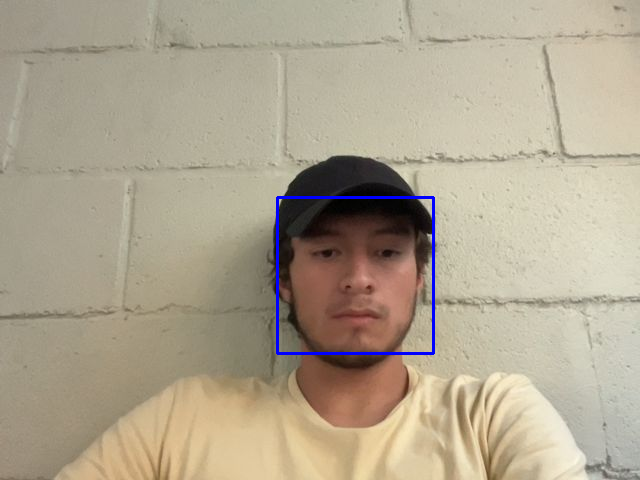

-1

In [13]:
from google.colab.patches import cv2_imshow

import cv2 as cv

# Load the cascade
face_cascade = cv.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

# Read the input image
img = cv.imread('photo.jpg')

# Convert into grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the output
cv2_imshow(img)
cv.waitKey()

## Video face detection

In [ ]:
from google.colab.patches import cv2_imshow

import cv2 as cv

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display
    cv2_imshow('img', img)

    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
        
# Release the VideoCapture object
cap.release()

error: ignored